An undamped pendulum with no driving force is described by

$$ y'' + sin(y) = 0$$

We reduce this to standard form of a system of first order ODEs by letting $y_1 = y$ and $y_2=y_1'$. This leads to:
\begin{align}
y_1' &= y_2\\
y_2' &= -\sin(y_1)
\end{align}

The phase portrait is a plot of a vector field which qualitatively shows how the solutions to these equations will go from a given starting point. 

To generate the phase portrait, we need to compute the derivatives $y_1'$ and $y_2'$ at $t=0$ on a grid over the range of values for $y_1$ and $y_2$ we are interested in. We will plot the derivatives as a vector at each $(y1, y2)$ which will show us the initial direction from each point. We will examine the solutions over the range $-2 < y1 < 8$ and $-2 < y2 < 2$, and create a grid of 20 x 20 points.

(-4.0, 4.0)

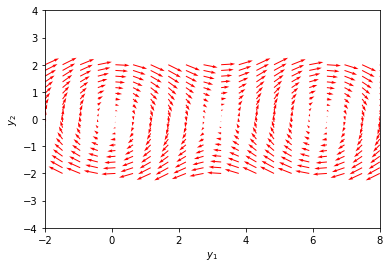

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # create zero matrices u and v, which have the same size as Y1 and Y2, resp.

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r') # Plot a 2D field of arrows, in this case, a slope field.

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

Let us plot a few solutions on the vector field. We will consider the solutions where $y1(0)=0$, and values of $y2(0) = [0, 0.5, 1, 1.5, 2, 2.5]$, in otherwords we start the pendulum at an angle of zero, with some angular velocity.

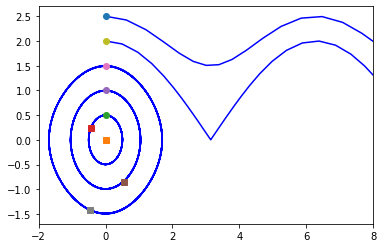

In [7]:
from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan) #generate solutions of the system with initial value y0   #dx/dt=f, x0=y0  x(t)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.show()